# Introduction
- Wanted to select a metric that had easily accessible data for assessing
- Initial ideas included more specific ideas(healthcare, crime, education), but we felt there were not enough data sets on each by neighborhood to make a quality assessment
- Decided to choose a broader metric to allow us to use the most relevant and complete data sets available

# Metric: Well-Being

- Defined by factors that impact the overall life quality of members of each neighborhood
- Looked at three different sub-metrics that each generally cover a different age range(youth, adults, seniors) to cover the well-being of an entire population

## Submetric 1: School enrollment of youths

### Examined "Pittsburgh American Community Survey 2015, School Enrollment" Dataset
- Lists school enrollment of students from elementary school to grad school by neighborhood
- School enrollment may correlate with future career success of population

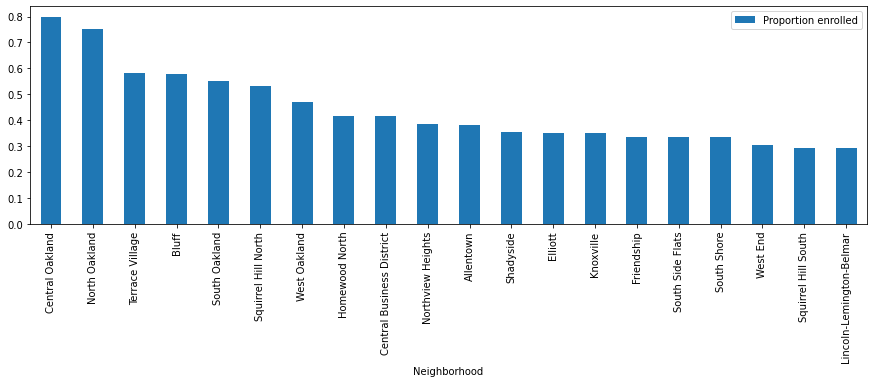

In [9]:
import pandas as pd

df_enroll = pd.read_csv("School-Enrollment.csv", sep=",")

# Adds column which calculates the ratio of children enrolled in school to total children

df_enroll["Proportion enrolled"]= df_enroll["Estimate; Enrolled in school:"]/df_enroll["Estimate; Total:"]

#Sorts neighborhoods by this ratio in descending order and creates a bar graph of the top 15

df_enroll_sort= df_enroll.sort_values("Proportion enrolled", ascending=False)

df_enroll_sort.iloc[:20].plot.bar(x='Neighborhood', y='Proportion enrolled', figsize=(15,4), title="School Enrollment by Neighborhood")

## Income

## Examined "Wage or Salary Income in the Past 12 Months" Dataset
- Lists number of people per neighborhood that earn a wage or salary and those that do not
- Provides evidence relating to Well-Being as it relates to financial security/unemployment rate

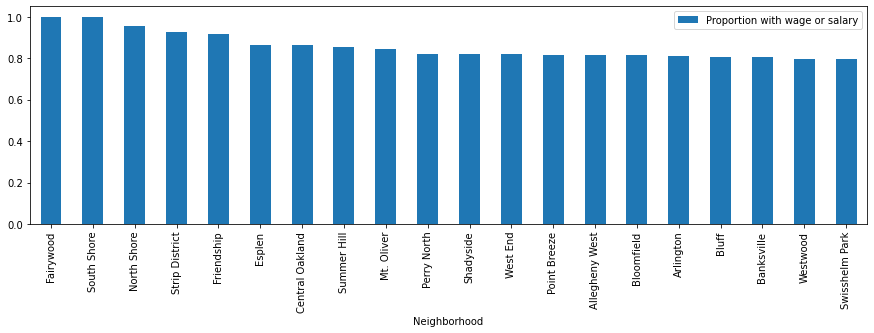

In [13]:

df_income = pd.read_csv("Income.csv", sep=",")

# Adds column which calculates proportion of total population per neighborhood that makes a wage or salary

df_income["Proportion with wage or salary"]= df_income["Estimate; Total: - With wage or salary income"]/df_income["Estimate; Total:"]

#Sorts neighborhoods by this ratio in descending order and creates a bar graph of the top 15
df_income_sort= df_income.sort_values("Proportion with wage or salary", ascending=False)

df_income_sort.iloc[:20].plot.bar(x='Neighborhood', y='Proportion with wage or salary', figsize=(15,4), title="Income by Neighborhood")

## Submetric 3: Median Age at Death

### Examined "Median Age at Death 2011-15 by Neighborhood" Dataset
- Lists median age of death by neighborhood
- Median age of death may correlate to overall health of a population

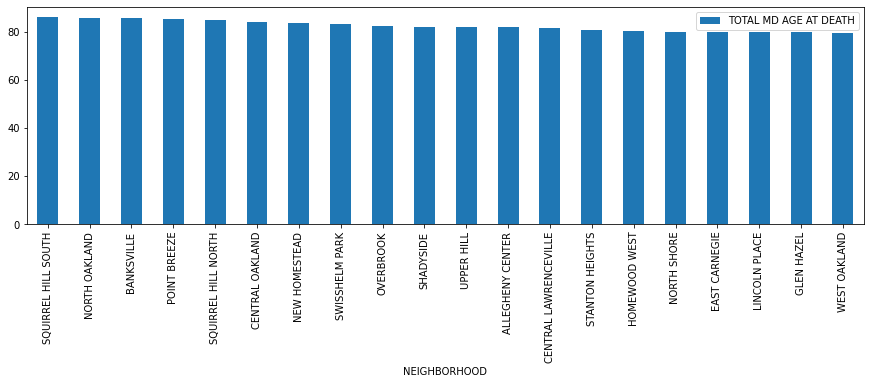

In [12]:
df_death = pd.read_csv("Median-Age-At-Death.csv", sep=",")

#Sorts neighborhoods in descending order by median age of death
df_death_sort= df_death.sort_values("TOTAL MD AGE AT DEATH", ascending=False)

df_death_sort.iloc[:20].plot.bar(x='NEIGHBORHOOD', y='TOTAL MD AGE AT DEATH', figsize=(15,4), title="School Enrollment by Neighborhood")

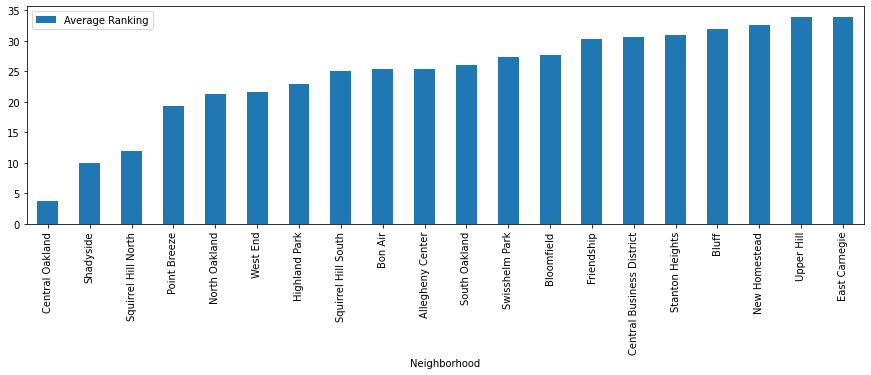

In [15]:
# Creates Dataframe that will be used to rank neighborhoods on overall metric

df_best = pd.DataFrame(columns = ["Neighborhood", "School Enrollment Ranking", "Income Ranking", "Median Death Ranking", "Average Ranking"])
i = 1

# Calculates average ranking from all three sub-metrics
for neighborhood in df_enroll_sort["Neighborhood"].tolist():
    if neighborhood in df_income_sort["Neighborhood"].tolist() and neighborhood.upper() in df_death["NEIGHBORHOOD"].tolist():
        enroll_ranking = df_enroll_sort["Neighborhood"].tolist().index(neighborhood)
        income_ranking = df_income_sort["Neighborhood"].tolist().index(neighborhood)
        death_ranking = df_death_sort["NEIGHBORHOOD"].tolist().index(neighborhood.upper())
        avg_ranking = (enroll_ranking + income_ranking + death_ranking)/3
        

        df_best.loc[i] = [neighborhood, enroll_ranking, income_ranking, death_ranking, avg_ranking]
        i +=1

df_best_sort= df_best.sort_values("Average Ranking")


df_best_sort.iloc[:20].plot.bar(x='Neighborhood', y='Average Ranking', figsize=(15,4))
                


## Conclusion: Central Oakland is the best neighborhood
- Akash: The final result matched my opinion of what my favorite neighborhood mainly because it is the one I am most familiar with, and the one that most students most likely know the best as well. I think that in looking at how we determined the best neighborhood, we gave each of the three sub metrics the same amount of weight. This likely shifted Central Oakland further up because of the high amount of college students residing within it, which made it win by such a large margin, even though other neighborhoods beat it initially, so maybe Shadyside or Squirrel Hill North may be more fitting for title of best neighborhood when taking this into account. It was also interesting to see how consistently some names of neighborhoods showed up in the top fifteen for each submetric, even though ours did not necessarily directly relate, showing how these factors influencing well-being are so interlinked even if not at first glance.

 - Shihab: Based on an analysis of school enrollment of youths, median age of death, and wage or salary data in various neighborhoods, Central Oakland emerges as a compelling choice for its favorable overall profile. With a high proportion of youths enrolled in school, indicative of a robust educational environment, a median age of death suggesting a healthier living environment, and a strong economic indicator reflected in wage or salary levels over the past 12 months, Central Oakland demonstrates a well-rounded appeal. The decision to determine Central Oakland as the "best" neighborhood is based on a weighted collection of these factors, considering the importance of education as a significant determinant. However, it's crucial to acknowledge the subjectivity inherent in defining the "best" neighborhood and to recognize the potential limitations of the available data in capturing the full complexity of urban dynamics.





